<a href="https://colab.research.google.com/github/Renato-Passos/Analise-de-dados-CAGED/blob/main/Caged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')
low_memory=False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
import glob;
from itertools import chain;

%matplotlib inline


caged = pd.read_csv('/content/drive/MyDrive/txt/2019/CAGEDEST_122019.txt', sep=";", encoding='latin-1');

gastos = pd.read_excel('/content/drive/MyDrive/gastos_2019.xls', sheet_name=0);

caged.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,Qtd Hora Contrat,IBGE Subsetor,Idade,Ind Aprendiz,Ind Portador Defic,Raça Cor,Salário Mensal,Saldo Mov,Sexo,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Bairros SP,Bairros Fortaleza,Bairros RJ,Distritos SP,Regiões Adm DF,Mesorregião,Microrregião,Região Adm RJ,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201912,110060,2019,623410,1112,1113,111399,1,7,44,25,25,0,0,6,"000998,00",1,1,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11003,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201912,110020,2019,411005,1155,1156,115600,1,8,44,25,25,0,0,2,"001450,00",1,1,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1101,11001,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201912,110146,2019,623110,1155,1156,115600,1,4,44,25,36,0,0,9,"001838,00",1,1,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11008,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
3,1,201912,110146,2019,512105,1155,1156,115600,1,5,44,25,36,0,0,9,"001930,00",1,1,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11008,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
4,1,201912,110020,2019,422105,1155,1156,115600,1,8,44,25,18,0,0,2,"001300,00",1,2,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1101,11001,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0


In [26]:
gastos = pd.read_excel('/content/drive/MyDrive/gastos_2019.xls');

gastos.sample(10)

colunas = ['graudeinstrução', 'idade', 'sexo', 'tipomovimentação', 'salário', 'raçacor', 'seção']
movimentacao2020 = {
    'abril':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202004.txt', delimiter=";", usecols=colunas),
    'maio':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202005.txt', delimiter=";", usecols=colunas),
    'junho':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202006.txt', delimiter=";", usecols=colunas),
    'julho':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202007.txt', delimiter=";", usecols=colunas),
    'agosto':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202008.txt', delimiter=";", usecols=colunas),
    'setembro':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202009.txt', delimiter=";", usecols=colunas),
    'outubro':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202010.txt', delimiter=";", usecols=colunas),
    'novembro':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202011.txt', delimiter=";", usecols=colunas),
    'dezembro':pd.read_csv('/content/drive/MyDrive/txt/2020/CAGEDMOV202012.txt', delimiter=";", usecols=colunas)
}

movimentacao2021 = {
    'janeiro':pd.read_csv('/content/drive/MyDrive/txt/2021/CAGEDMOV202101.txt', delimiter=";", usecols=colunas),
    'fevereiro':pd.read_csv('/content/drive/MyDrive/txt/2021/CAGEDMOV202102.txt', delimiter=";", usecols=colunas),
    'marco':pd.read_csv('/content/drive/MyDrive/txt/2021/CAGEDMOV202103.txt', delimiter=";", usecols=colunas),
    'abril':pd.read_csv('/content/drive/MyDrive/txt/2021/CAGEDMOV202104.txt', delimiter=";", usecols=colunas)
}

In [27]:
caged.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

In [28]:
caged.rename(columns={'Salário Mensal': 'Salario'}, inplace = True)
caged['Salario'] =  caged['Salario'].apply(lambda x :  x.replace(',','.'))
caged['Salario'] =  pd.to_numeric(caged['Salario'])

In [29]:
caged.rename(columns={'Admitidos/Desligados': 'Admitidos_Desligados'}, inplace = True)

In [30]:
caged.loc[(caged.Admitidos_Desligados == 1), 'Admitidos_Desligados'] = 'Admitidos'
caged.loc[(caged.Admitidos_Desligados == 2), 'Admitidos_Desligados'] = 'Desligados'
 
caged.loc[(caged.Sexo == 1), 'Sexo'] = 'Homem'
caged.loc[(caged.Sexo == 2), 'Sexo'] = 'Mulher'

In [31]:

caged.head()

,Admitidos_Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,Qtd Hora Contrat,IBGE Subsetor,Idade,Ind Aprendiz,Ind Portador Defic,Raça Cor,Salario,Saldo Mov,Sexo,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Bairros SP,Bairros Fortaleza,Bairros RJ,Distritos SP,Regiões Adm DF,Mesorregião,Microrregião,Região Adm RJ,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,Admitidos,201912,110060,2019,623410,1112,1113,111399,1,7,44,25,25,0,0,6,998.0,1,Homem,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11003,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
1,Admitidos,201912,110020,2019,411005,1155,1156,115600,1,8,44,25,25,0,0,2,1450.0,1,Homem,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1101,11001,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
2,Admitidos,201912,110146,2019,623110,1155,1156,115600,1,4,44,25,36,0,0,9,1838.0,1,Homem,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11008,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
3,Admitidos,201912,110146,2019,512105,1155,1156,115600,1,5,44,25,36,0,0,9,1930.0,1,Homem,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1102,11008,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
4,Admitidos,201912,110020,2019,422105,1155,1156,115600,1,8,44,25,18,0,0,2,1300.0,1,Mulher,"0000,0",3,0,1,11,{ñ c,{ñ c,{ñ c,{ñ c,0,1101,11001,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0


1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por: 

*   Gênero 
*   Classe social
*   Faixa Etária
*   Nível de escolaridade
*   Setores (Agronegócio, Indústria, Comércio, etc...) 


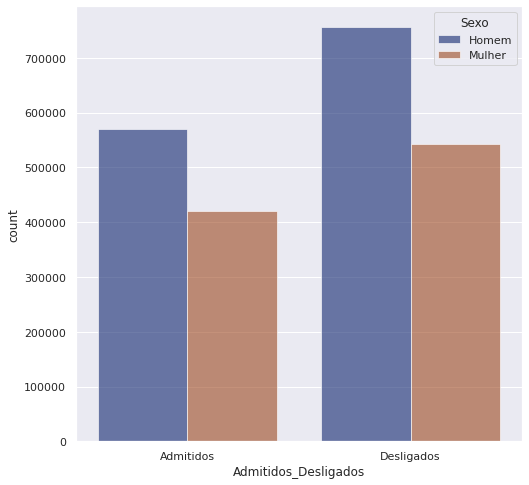

In [32]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})
g = sns.countplot(
    x='Admitidos_Desligados', data=caged, hue='Sexo', palette="dark", alpha=.6
)

In [33]:
um = [10,11,12,13,14,15,16,17,18,19,]
dois = [20,21,22,23,24,25,26,27,28,29]
tres = [30,31,32,33,34,35,36,37,38,39]
quatro = [40,41,42,43,44,45,46,47,48,49]
cinco = [50,51,52,53,54,55,56,57,58,59]
seis = [60,61,62,63,64,65,66,67,68,69]
sete = [70,71,72,73,74,75,76,77,78,79]
oito = [80,81,82,83,84,85,86,87,88,89]
nove = [90,91,92,93,94,95,96,97,98,99]

listaUm = [um, dois, tres, quatro, cinco, seis, sete, oito, nove]
listaDois = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']


#for k in oito:
 # caged.loc[(caged.Idade == k), 'Idade'] = "testeoito"

for i in listaUm:
  for j in i:
    aux = listaUm.index(i)
#    print(aux)
 #   print(j)
 #   print(listaDois[aux])
 #   print("-----------")
    caged.loc[(caged.Idade == j), 'Idade'] = listaDois[aux]


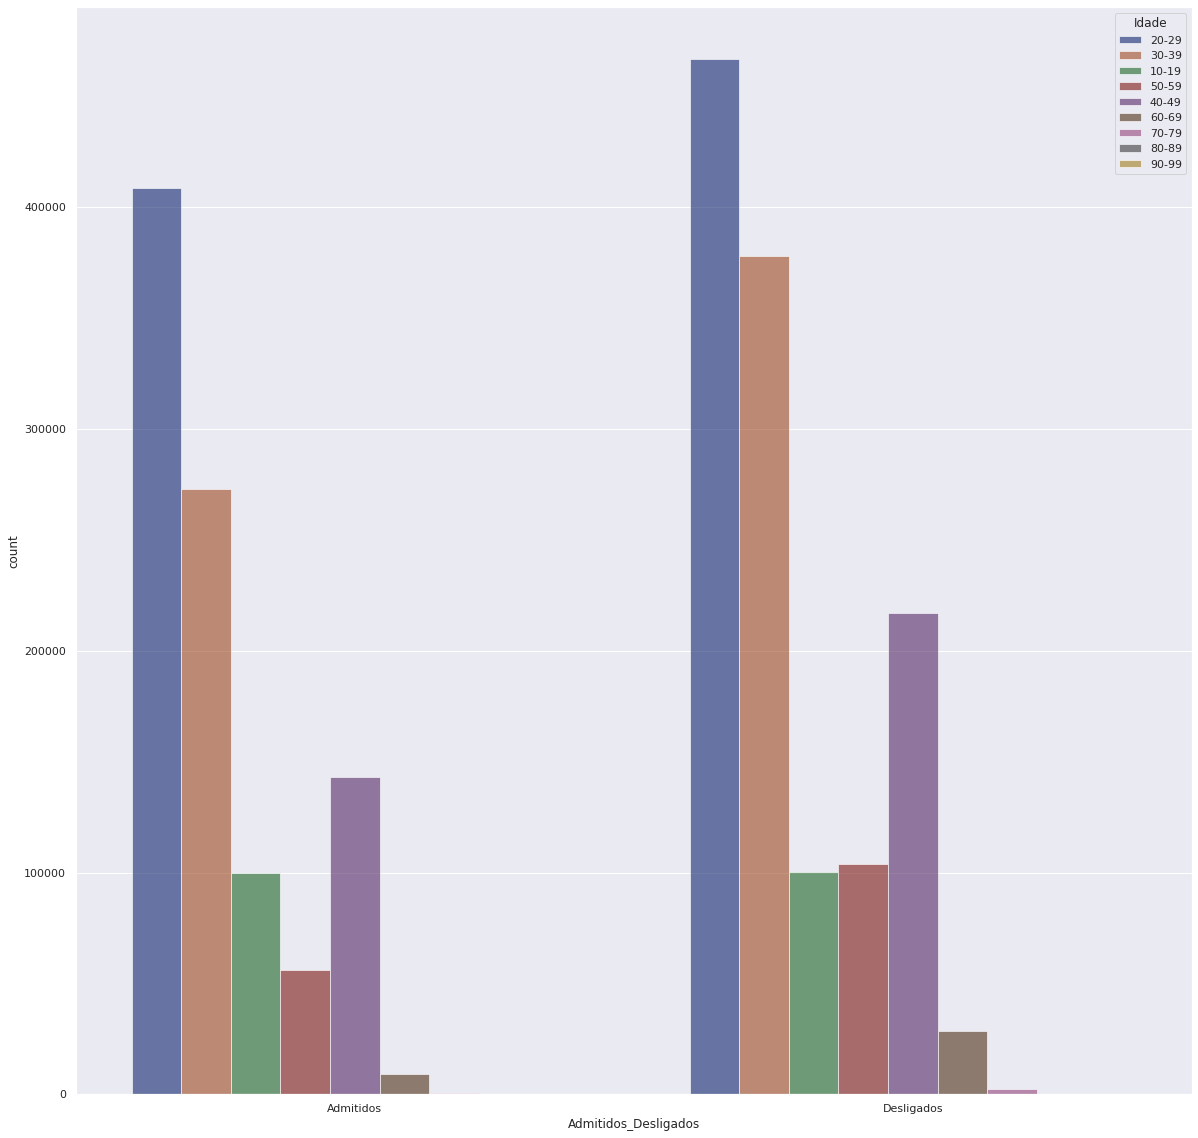

In [34]:
sns.set(rc={'figure.figsize':(20,20)})

g = sns.countplot(
    x='Admitidos_Desligados', data=caged, hue='Idade', palette="dark", alpha=.6
)

In [35]:
caged.rename(columns={'Raça Cor': 'Raça_Cor'}, inplace = True)
caged.loc[(caged.Raça_Cor == 1), 'Raça_Cor'] = 'Indigena'
caged.loc[(caged.Raça_Cor == 2), 'Raça_Cor'] = 'Branca'
caged.loc[(caged.Raça_Cor == 4), 'Raça_Cor'] = 'Preta'
caged.loc[(caged.Raça_Cor == 6), 'Raça_Cor'] = 'Amarela'
caged.loc[(caged.Raça_Cor == 8), 'Raça_Cor'] = 'Parda'
caged.loc[(caged.Raça_Cor == 9), 'Raça_Cor'] = 'Nao identificado'
caged.loc[(caged.Raça_Cor == -1), 'Raça_Cor'] = 'Ignorado'

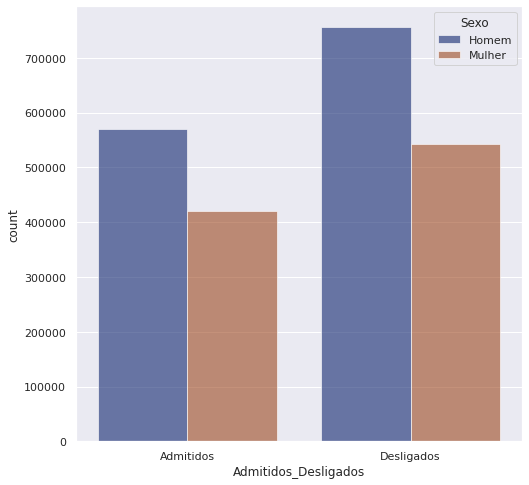

In [36]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,8)})
g = sns.countplot(
    x='Admitidos_Desligados', data=caged, hue='Sexo', palette="dark", alpha=.6
)

In [37]:
caged.rename(columns={'Grau Instrução': 'Grau_Instrucao'}, inplace = True)


caged.loc[(caged.Grau_Instrucao == 1), 'Grau_Instrucao'] = 'Analfabeto'
caged.loc[(caged.Grau_Instrucao == 2), 'Grau_Instrucao'] = 'Até o 5º ano Incompleto'
caged.loc[(caged.Grau_Instrucao == 3), 'Grau_Instrucao'] = '5º Completo Fundamental'
caged.loc[(caged.Grau_Instrucao == 4), 'Grau_Instrucao'] = '6º a 9º Cundamental'
caged.loc[(caged.Grau_Instrucao == 5), 'Grau_Instrucao'] = 'Fundamental Completo'
caged.loc[(caged.Grau_Instrucao == 6), 'Grau_Instrucao'] = 'Médio Incompleto'
caged.loc[(caged.Grau_Instrucao == 7), 'Grau_Instrucao'] = 'Médio Completo'
caged.loc[(caged.Grau_Instrucao == 8), 'Grau_Instrucao'] = 'Superior Incompleto'
caged.loc[(caged.Grau_Instrucao == 9), 'Grau_Instrucao'] = 'Superior Completo'
caged.loc[(caged.Grau_Instrucao == 10), 'Grau_Instrucao'] = 'Mestrado'
caged.loc[(caged.Grau_Instrucao == 11), 'Grau_Instrucao'] = 'Doutorado'
caged.loc[(caged.Grau_Instrucao == 80), 'Grau_Instrucao'] = 'Pós-Graduação Completa'
caged.loc[(caged.Grau_Instrucao == 99), 'Grau_Instrucao'] = 'Não Indentificado'




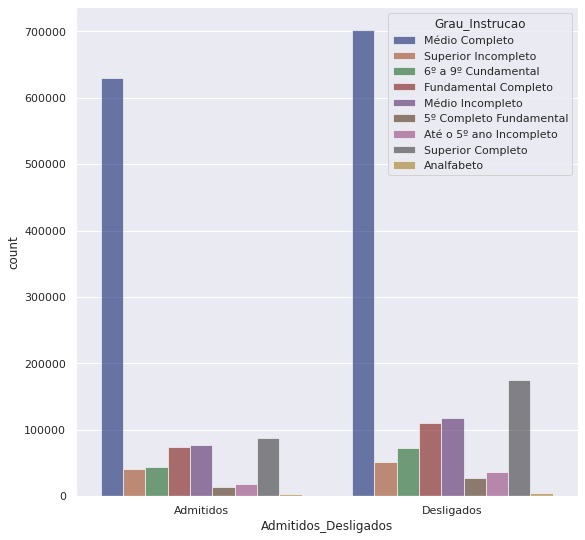

In [38]:
sns.set(rc={'figure.figsize':(9,9)})
g = sns.countplot(
    x='Admitidos_Desligados', data=caged, hue='Grau_Instrucao', palette="dark", alpha=.6
)

2 – Quais foram as estatísticas de consumo/gastos após o aumento ou diminuição do: 

*   Emprego
*   Desemprego 



In [39]:
# Raspagem dos Dados CAGED 2018
caged2018 = pd.read_csv('/content/drive/MyDrive/cagedDez2018.txt', sep=";", encoding='latin-1');


FileNotFoundError: ignored

In [ ]:
caged2018.rename(columns={'Admitidos/Desligados': 'Admitidos_Desligados'}, inplace = True)

caged2018.loc[(caged2018.Admitidos_Desligados == 1), 'Admitidos_Desligados'] = 'Admitidos'
caged2018.loc[(caged2018.Admitidos_Desligados == 2), 'Admitidos_Desligados'] = 'Desligados'

In [ ]:
#Total de pessoas Admitidas e Desligadas em 2018
total2018 = caged2018['Admitidos_Desligados'].count()

#Total de pessoas Admitidas em 2018
totalAdmitidosArray2018 = caged2018[caged2018['Admitidos_Desligados'] == "Admitidos"]
totalAdmitidos2018 = totalAdmitidosArray2018['Admitidos_Desligados'].count()

#Total de pessoas Demitidas em 2018
totalDemitidosArray2018 = caged2018[caged2018['Admitidos_Desligados'] == "Desligados"]
totalDemitidos2018 = totalDemitidosArray2018['Admitidos_Desligados'].count()

In [ ]:
#Total de pessoas Admitidas e Desligadas em 2019
total2019 = caged['Admitidos_Desligados'].count()

#Total de pessoas Admitidas em 2019
totalAdmitidosArray2019 = caged[caged['Admitidos_Desligados'] == "Admitidos"]
totalAdmitidos2019 = totalAdmitidosArray2019['Admitidos_Desligados'].count()

#Total de pessoas Demitidas em 2019
totalDemitidosArray2019 = caged[caged['Admitidos_Desligados'] == "Desligados"]
totalDemitidos2019 = totalDemitidosArray2019['Admitidos_Desligados'].count()

In [ ]:
#Calculo das Taxas de Gastos na Receita no ano de 2018 e 2019
totalGastos2018 = gastos.iloc[324,6] #Total de Gastos de 2018 em impostos

totalGastos2019 = gastos.iloc[337,6] #Total de Gastos de 2019 em impostos

In [ ]:
labels = ['2018', '2019']
totAdmitidos = [totalAdmitidos2018, totalAdmitidos2019]
totDemitidos = [totalDemitidos2018, totalDemitidos2019]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, totAdmitidos, width, label='Admitidos')
rects2 = ax.bar(x + width/2, totDemitidos, width, label='Desligados')

ax.set_ylabel('Índice')
ax.set_title('Total de Pessoas Admitidas e Desligadas nos anos de 2018 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

ano = ('2018', '2019')
gastosX = np.arange(len(ano))
performance = (totalGastos2018, totalGastos2019)
error = np.random.rand(len(ano))

ax.barh(gastosX, performance, xerr=error, align='center')
ax.set_yticks(gastosX)
ax.set_yticklabels(ano)
ax.invert_yaxis() 
ax.set_xlabel('Gastos/Consumo de Impostos em R$')
ax.set_title('Gastos e Consumos de Impostos nos anos de 2018 e 2019')

plt.show()

3 - Quero saber a quantidade de admissões/demissões por gênero no período da pandemia.


Text(0.5, 1.0, 'Homens demitidos durante o período da pandemia')

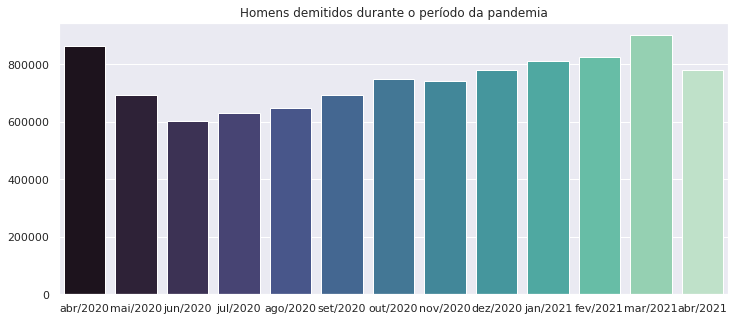

In [40]:
admissaoDemissaoHomem = {'admitidos':[] , 'demitidos':[]}
admissaoDemissaoMulher = {'admitidos':[] , 'demitidos':[]}

codigo_admitidos = [10,20,25,35,70]
codigo_demitidos = [31,32,33,40,43,45,50,60,80,90,98]
meses_grafico = ['abr/2020', 'mai/2020', 'jun/2020', 'jul/2020', 'ago/2020', 'set/2020', 'out/2020', 'nov/2020', 'dez/2020', 'jan/2021', 'fev/2021', 'mar/2021', 'abr/2021']

for mes in movimentacao2020:
    condicaoDemitidos2020 = movimentacao2020[mes]['tipomovimentação'].isin(codigo_demitidos) 
    condicaoAdmitidos2020 = movimentacao2020[mes]['tipomovimentação'].isin(codigo_admitidos) 
    condicaoFeminina2020 =  movimentacao2020[mes]['sexo']==3
    condicaoMasculina2020 = movimentacao2020[mes]['sexo']==1
    admissaoDemissaoHomem['demitidos'].append(movimentacao2020[mes].loc[(condicaoMasculina2020 & condicaoDemitidos2020)]['sexo'].value_counts().to_dict()[1])
    admissaoDemissaoMulher['demitidos'].append(movimentacao2020[mes].loc[(condicaoFeminina2020 & condicaoDemitidos2020)]['sexo'].value_counts().to_dict()[3])
    admissaoDemissaoHomem['admitidos'].append(movimentacao2020[mes].loc[(condicaoMasculina2020 & condicaoAdmitidos2020)]['sexo'].value_counts().to_dict()[1])
    admissaoDemissaoMulher['admitidos'].append(movimentacao2020[mes].loc[(condicaoFeminina2020 & condicaoAdmitidos2020)]['sexo'].value_counts().to_dict()[3])

for mes in movimentacao2021:
    condicaoDemitidos2021 = movimentacao2021[mes]['tipomovimentação'].isin(codigo_demitidos) 
    condicaoAdmitidos2021 = movimentacao2021[mes]['tipomovimentação'].isin(codigo_admitidos) 
    condicaoFeminina2021 =  movimentacao2021[mes]['sexo']==3
    condicaoMasculina2021 = movimentacao2021[mes]['sexo']==1
    admissaoDemissaoHomem['demitidos'].append(movimentacao2021[mes].loc[(condicaoMasculina2021 & condicaoDemitidos2021)]['sexo'].value_counts().to_dict()[1])
    admissaoDemissaoMulher['demitidos'].append(movimentacao2021[mes].loc[(condicaoFeminina2021 & condicaoDemitidos2021)]['sexo'].value_counts().to_dict()[3])
    admissaoDemissaoHomem['admitidos'].append(movimentacao2021[mes].loc[(condicaoMasculina2021 & condicaoAdmitidos2021)]['sexo'].value_counts().to_dict()[1])
    admissaoDemissaoMulher['admitidos'].append(movimentacao2021[mes].loc[(condicaoFeminina2021 & condicaoAdmitidos2021)]['sexo'].value_counts().to_dict()[3])

sns.set(rc={'figure.figsize':(12,5)})
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x=meses_grafico, y=admissaoDemissaoHomem['demitidos'], palette="mako")
plt.title('Homens demitidos durante o período da pandemia')

Text(0.5, 1.0, 'Mulheres demitidas durante o período da pandemia')

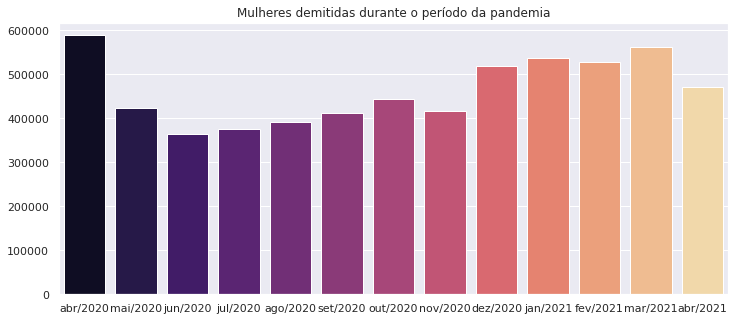

In [41]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=meses_grafico, y=admissaoDemissaoMulher['demitidos'], palette="magma")
plt.title('Mulheres demitidas durante o período da pandemia')

Text(0.5, 1.0, 'Homens admitidos durante o período da pandemia')

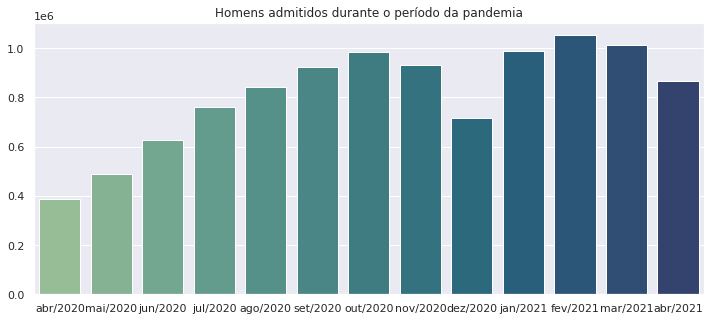

In [42]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=meses_grafico, y=admissaoDemissaoHomem['admitidos'], palette="crest")
plt.title('Homens admitidos durante o período da pandemia')

Text(0.5, 1.0, 'Mulheres admitidas durante o período da pandemia')

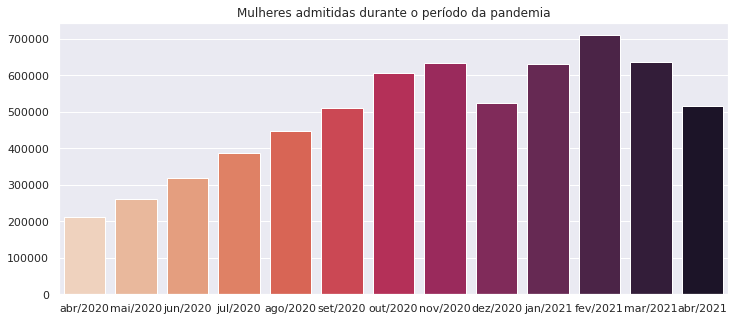

In [43]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=meses_grafico, y=admissaoDemissaoMulher['admitidos'], palette="rocket_r")
plt.title('Mulheres admitidas durante o período da pandemia')

4 - Quero saber a quantidade de demissões por tipo, tipo movimentação / demissão.
	    

*   Diferença salarial entre homens e mulheres admitidos;
*   Diferença salarial entre homens e mulheres demitidos;
*   Média salarial por raça/cor;

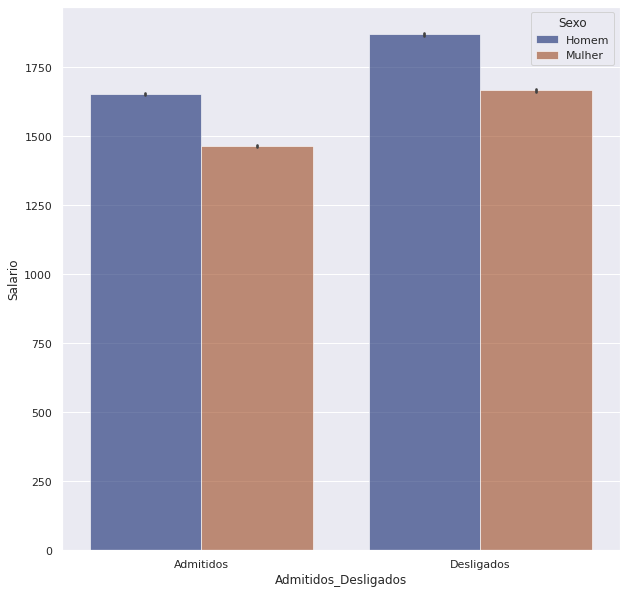

In [44]:
sns.set(rc={'figure.figsize':(10,10)})

g = sns.barplot(
    x='Admitidos_Desligados', y='Salario', data=caged, hue='Sexo', palette="dark", alpha=.6
)

In [45]:
caged.groupby(['Raça_Cor']).Salario.mean()

Raça_Cor
Amarela             2252.820168
Branca              1922.250314
Indigena            1523.881169
Nao identificado    1535.226195
Parda               1523.429250
Preta               1508.376338
Name: Salario, dtype: float64

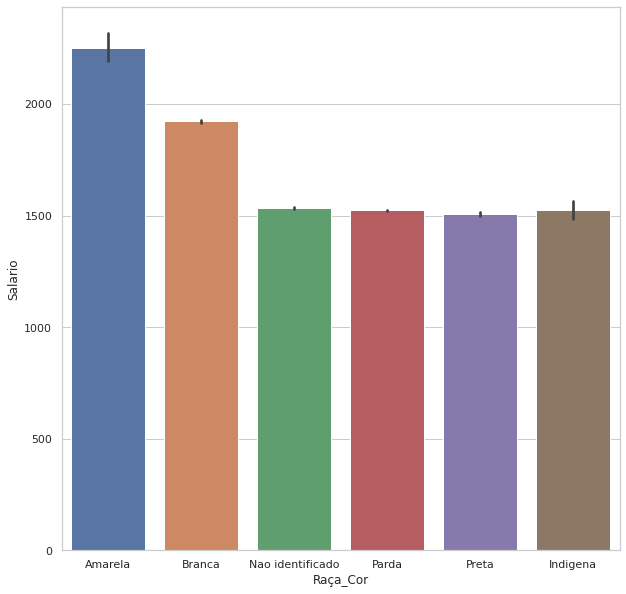

In [46]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Raça_Cor", y="Salario", data=caged)

5 - Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária;

In [47]:
path = {2020 : r'/content/drive/MyDrive/txt/2020', 2021 : r'/content/drive/MyDrive/txt/2021'}

filenames = []

for f in path.values():
  filenames.append(glob.glob(f + '/*.txt'))
  
filenames = list(chain(*filenames))

In [48]:
lista_dfs = [ ]
colunas = ['idade', 'sexo', 'tipomovimentação', 'raçacor']

for l in filenames:
  lista_dfs.append(pd.read_csv(l, sep=";", usecols=colunas, encoding="utf-8"))

In [49]:
df = pd.concat(lista_dfs, ignore_index=True) 

In [50]:
df.columns = ['Idade', 'Sexo', 'Causa da demissão', 'Raça/Cor']

In [51]:
df.head()

,Idade,Sexo,Causa da demissão,Raça/Cor
0,18.0,1,31,1
1,44.0,1,31,1
2,48.0,1,43,3
3,28.0,1,40,6
4,20.0,3,43,3


In [52]:
df.isnull().sum()

Idade                64
Sexo                  0
Causa da demissão     0
Raça/Cor              0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df['Causa da demissão'] = df['Causa da demissão'].map({
    31:'Desligamento por Demissão sem Justa Causa', 
    32:'Desligamento por Demissão com Justa Causa', 
    33:'Culpa Recíproca',
    40:'Desligamento a Pedido',
    43:'Término contrato trabalho prazo determinado',
    45:'Desligamento por Término de Contrato',
    50:'Desligamento por Aposentadoria', 
    60:'Desligamento por morte',
    80:'Desligamento por Transferência', 
    90:'Desliamento por Acordo Empregado e Empregador',
    98:'Desligamento de Tipo Ignorado'  
})

df['Sexo'] = df['Sexo'].map({
    1: 'Masculino',
    3: 'Femino'
})

df['Raça/Cor'] = df['Raça/Cor'].map({
    1:"Branca",
    2:"Preta",
    3:"Parda",
    4:"Amarela",
    5:"Indígena",
    6:"Não informada",
    9:"Não Identificado"
})

df['Faixa Etária'] = pd.cut(
    df['Idade'],
    bins = [0, 19, 59, 100],
    labels=['Jovem', 'Adulto', 'Idoso']
)

In [55]:
df.dropna(inplace=True)

* Causas de demissão distribuídas por sexo:

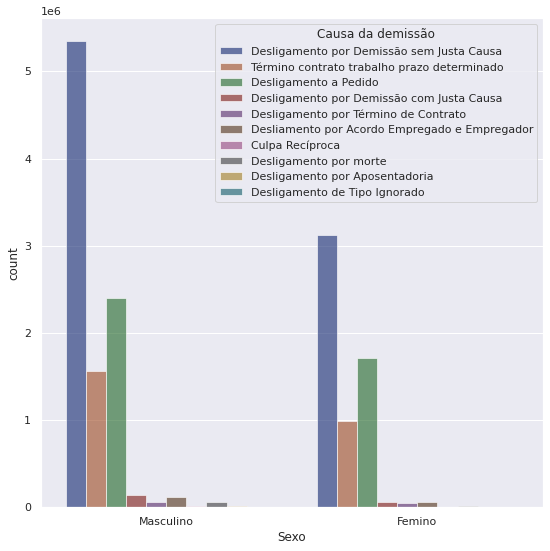

In [56]:
sns.set(rc={'figure.figsize':(9,9)})
g = sns.countplot(
  data=df, x='Sexo', hue='Causa da demissão', palette="dark", alpha=.6
)

* Causas de demissão distribuídas por raça/cor:

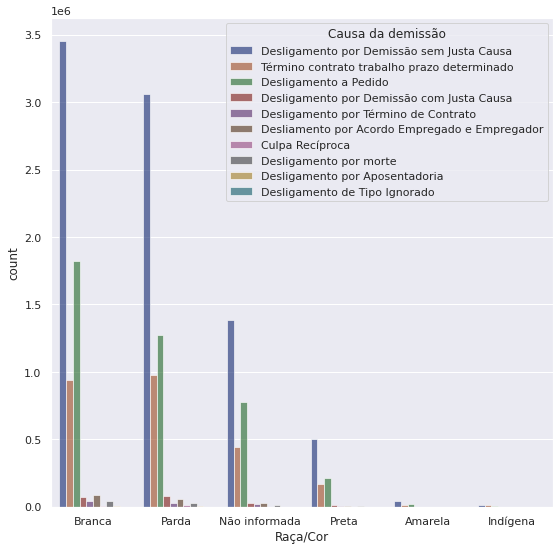

In [57]:
sns.set(rc={'figure.figsize':(9,9)})
g = sns.countplot(
    data=df, x='Raça/Cor', hue='Causa da demissão', palette="dark", alpha=.6
)

* Causas de demissão distribuídas por faixa etária:

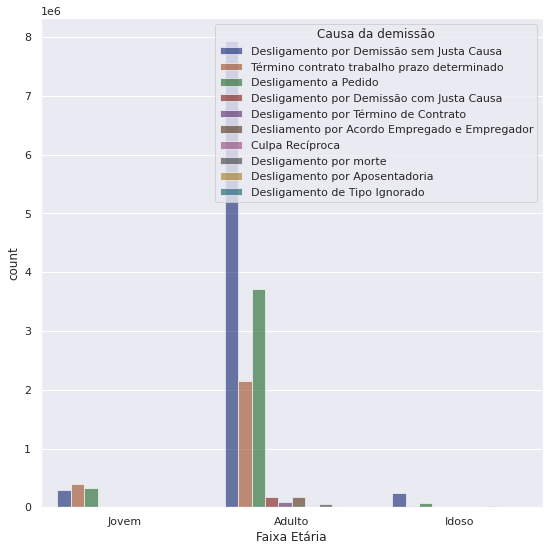

In [58]:
sns.set(rc={'figure.figsize':(9,9)})
g = sns.countplot(
     data=df, x='Faixa Etária', hue='Causa da demissão', palette="dark", alpha=.6
)